# Data preprocessing, EDA and visualization 📊🧮

This notebook includes a series of steps to load, clean, and analyze a dataset. We will:

1. Loading the survey data.
   
2. Analyzing missing values.
   
3. Handling missing values.
   
4. Performing exploratory data analysis (EDA).
   
5. Visualizing the most interesting findings.
   
6. Providing selection based on rows and/or columns (if needed)

### Loading the survey data 📥

First, we'll load the data from the CSV file into a pandas DataFrame and display the first few rows to understand the structure of the dataset.

- We'll load the CSV file into pandas DataFrame using `pd.read_csv(file_path)`.
  
- Then we'll use `head(3)` to display the first 3 rows of the data.

In [98]:
import pandas as pd

# Path to the file
file_path = r'C:\Users\rejen\OneDrive\Documents\GitHub\ProjektAnalitiks\data\01_Raw\01_DataCompetencySurvey.csv'

# Loading the data
data = pd.read_csv(file_path)

# Displaying the first three rows
print("Initial data:")
print(data.head(3))

Initial data:
   ID  Godzina rozpoczęcia   Godzina ukończenia Adres e-mail  Nazwa  \
0   1  2024-03-05 15:25:52  2024-03-05 15:33:04    anonymous    NaN   
1   2  2024-03-05 15:29:46  2024-03-05 15:35:02    anonymous    NaN   
2   3  2024-03-05 15:16:30  2024-03-05 15:37:17    anonymous    NaN   

   Czas ostatniej modyfikacji  \
0                         NaN   
1                         NaN   
2                         NaN   

  Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.  \
0  Projekt "data" będący mobilną stacją benzynową...                                                    
1                                                NaN                                                    
2                                                NaN                                                    

      W jaki sposób chcesz uczestniczyć w Community?  Programming: R  \
0  Chcę uczestniczyć w projekcie data i organizow...             2.0   
1  

Now let's try checking basic statistics of loaded data.

In [99]:
data.describe()

,ID,Nazwa,Czas ostatniej modyfikacji,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,"CLI: (np. Bash, PowerShell, CMD)","Front End: (HTML, JavaScript, CSS)",...,Współpraca z administracją UEW,FinTech,HealthTech,FashionTech,E-commerce,SportTech,Non-profit,PropTech (nieruchomości),Cybersecurity,HR
count,67.000000,0.0,0.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,34.000000,NaN,NaN,1.847458,2.593220,1.305085,1.983051,1.372881,1.457627,1.508475,...,1.400000,1.733333,1.483333,1.050000,1.633333,1.216667,1.333333,1.233333,1.416667,1.083333
std,19.485037,NaN,NaN,1.047387,0.697746,1.192711,1.252467,1.230339,1.222237,1.072748,...,0.960226,1.147830,1.016669,0.909926,0.956098,0.922261,0.985775,0.908839,0.869281,0.869281
min,1.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,NaN,NaN,1.000000,2.000000,0.000000,1.500000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.750000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.750000
50%,34.000000,NaN,NaN,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,50.500000,NaN,NaN,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,2.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,67.000000,NaN,NaN,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000


Out of 45 columns only 38 were taken into consideration, which might point to the fact that the other 7 columns are non-numeric.

---

### Analyzing missing values 🔎

Next, we'll check which columns have missing values and how many missing values there are. This step helps us understand the completeness of the data and plan for handling any missing values.

This step is crucial for understanding the quality of the dataset and planning how to handle any gaps in the data. We will explore the following:

- Simple overview of missing values to identify which columns have missing values and how many missing values there are in each column,
  
- Percentage of missing values for each column to get a better sense of the data quality,

- Visualizing missing data to get a more intuitive understanding of where the missing values are located.

Let's now check which rows we should consider removing from the dataset.

In [100]:
# Information about the data
# print("\nData info:")
# print(data.info())

# Checking for non-null values
non_null_values = data.notnull().sum()
print("\nNon-null values:")
# Sorting non-null values in ascending order
non_null_values_sorted = non_null_values.sort_values(ascending=True)

# Print only the top 10 non-null values
print(non_null_values_sorted.head(10))



Non-null values:
Nazwa                                                                                                   0
Czas ostatniej modyfikacji                                                                              0
Jeżeli pominięto branżę, na której się znasz dopisz ją:                                                10
Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:                            13
Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.    19
Area: Computer Vision                                                                                  59
Area: NLP                                                                                              59
Area: Classical ML (Clustering, Regression, Classification)                                            59
BI: Tableau                                                                                            59
BI: PowerBI                 

- `data.info()` - provides a concise summary of the DataFrame, including the number of non-null values in each column.

- `data.notnull()` - creates a DataFrame with the same structure as data, where each value is True if it is non-null and False otherwise.

- `.sum()` is then called on this DataFrame to count the non-null values in each column.

Based on above code sample we see that there are 5 extraordinarily empty columns.

### Percentage of missing values °/•

To understand the extent of missing values, we calculate their percentage for each column and sort them accordingly.

In [101]:
# Calculate the percentage of missing values
missing_percentage = (non_null_values_sorted / len(data)) * 100

# Print the percentage of missing values
print("\nPercentage of missing values:")

# Sort the missing percentages in ascending order and filter out non-missing values
missing_percentage_sorted = missing_percentage[missing_percentage > 0].sort_values(ascending=True)

# Print the top 10 values
top_5_missing_percentage = missing_percentage_sorted.head()
print(top_5_missing_percentage)



Percentage of missing values:
Jeżeli pominięto branżę, na której się znasz dopisz ją:                                                14.925373
Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:                            19.402985
Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.    28.358209
Front End: (HTML, JavaScript, CSS)                                                                     88.059701
Programming: R                                                                                         88.059701
dtype: float64


- `missing_values / len(data)` - divides the number of missing values by the total number of rows to get the proportion of missing values.

- `*100` - converts the proportion to a percentage

### Visualizing missing data

Visualizations can help us quickly understand the distribution of missing values in the dataset. We will use a heatmap to visualize missing data.

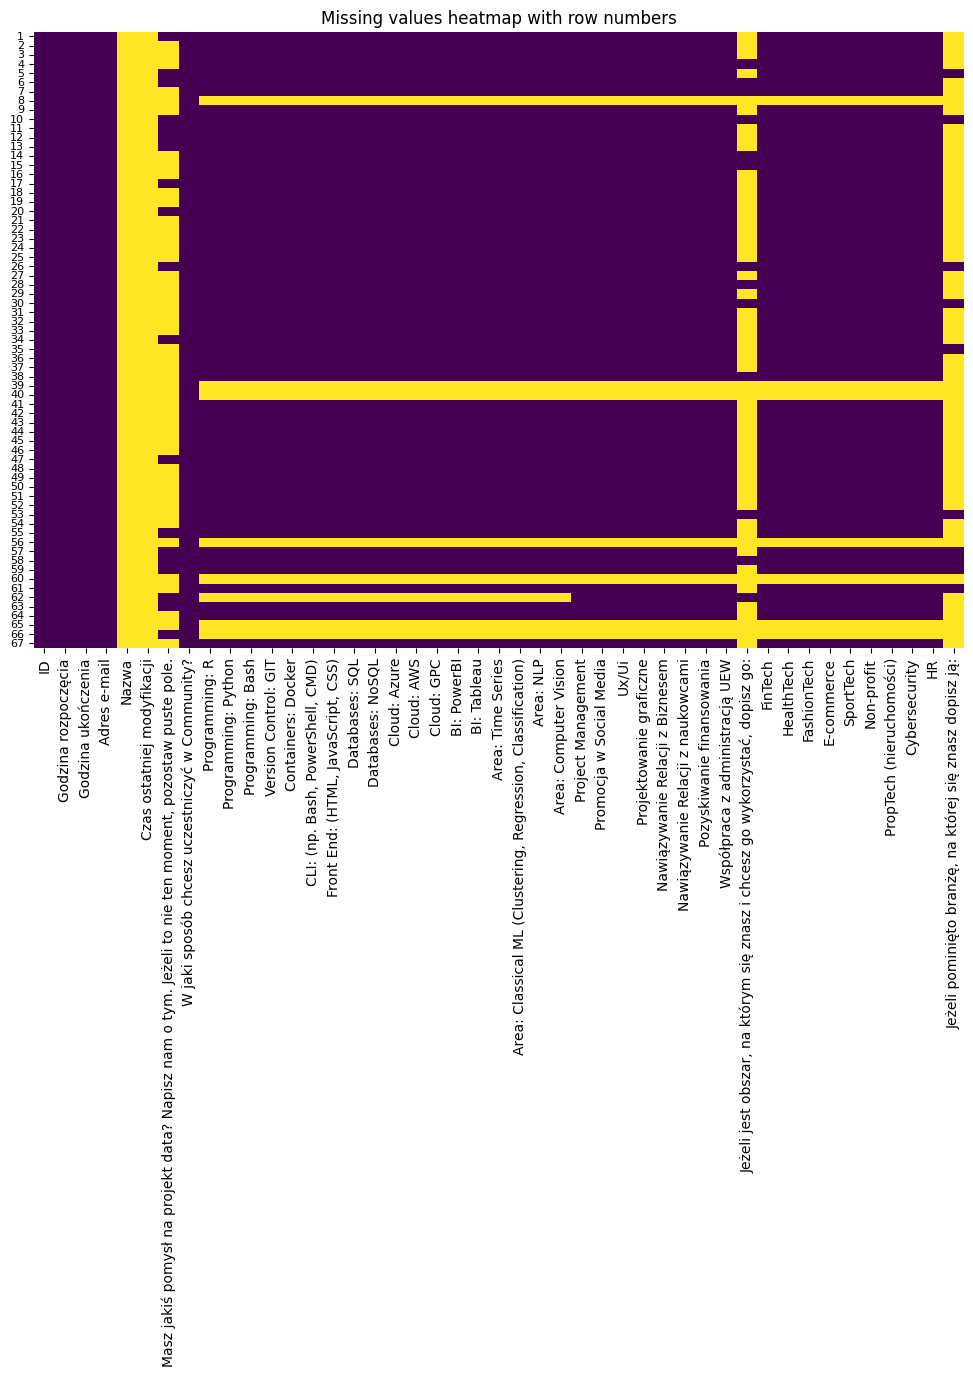

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing missing values using a heatmap with row numbers
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=(data.index + 1), annot=False)
plt.yticks(fontsize=8)
plt.title('Missing values heatmap with row numbers')
plt.show()

### Seaborn & matplotlib formula explaination:

`data.isnull()` - creates a DataFrame of the same shape as data with True for missing values and False for non-missing values.

`cbar=False` - hides the color bar to keep the plot clean.

`cmap='viridis'` - sets the color map to 'viridis', which is visually appealing and helps distinguish between missing and non-missing values.

`yticklabels=False` - hides the y-axis labels to reduce clutter.

`yticks(fontsize=8)` - lessens the Y axis font size to 8 for uncluttering.

After analyzing the missing values in the dataset, we can draw several important conclusions that will guide our data cleaning and preprocessing steps. Summarizing of our findings and the corresponding conclusions:

- Using `data.info()`, we observed that some columns have missing values, which are represented as NaN in the DataFrame.
The *missing_values* series indicates which columns have missing values and how many there are in each column.

- By calculating the percentage of missing values for each column, we can assess the extent of the missing data.

If a column has a very high percentage of missing values, it might be considered for removal, as it may not provide much useful information.
Conversely, columns with low percentages of missing values might be good candidates for imputation, where we fill in the missing values with appropriate substitutes (e.g., mean, median, mode).

- The heatmap provides a visual representation of the missing data, showing us the distribution of missing values across the dataset.
This visual aid helps us quickly identify any patterns in the missing data, such as whether the missing values are randomly distributed or if there are entire rows or columns with missing data.

Based on the analysis of missing values, we can conclude the following:

- Columns with a high percentage of missing values may need to be removed if they do not contribute significantly to the analysis.

- Columns with a low percentage of missing values can be imputed with the mean, median, or mode, depending on the nature of the data.

- If the missing values are randomly distributed, simple imputation methods may suffice.

- If there are patterns (e.g., missing values clustered in specific rows or columns), we may need to investigate further to understand the reasons behind the missing data and choose appropriate handling methods.

Based on the visual represantion of missing values (heatmap) we can see that the most empty columns are:

- `Nazwa` (name) - **100% missing values** - 0 values
  
- `Czas ostatniej modyfikacji` (last modified) - **100% missing values** - 0 values
  
- `Jeżeli pominięto branżę, na której się znasz dopisz ją:` - **85,07% missing values** - 10 values
  
- `Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:` - **80,6% missing values** - 13 values
 
- `Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.` - **71,64% missing values** - 19 values

All these fields are non-numeric data, which is harder to analyze and doesn't contribute much to the overall picture, so I decided to drop them from the dataset in the later stage of this analysis.

---

Now we will obtain information about **top 10 rows**, which introduce the largest portion of missing data.

In [103]:
# Identifying top 10 rows with the most missing values

missing_values_count = data.isnull().sum(axis=1)
rows_with_most_missing = missing_values_count.sort_values(ascending=False).head(10)

print(rows_with_most_missing)

55    40
64    40
7     40
39    40
38    40
59    40
65    39
61    21
1      5
48     5
dtype: int64


## Handling missing values

### Removing columns with high percentage of missing values ⛔

Knowing the number of rows and columns and specific rows with the most missing values we can now specify the threshold. If any row has more than a specified threshold (25%) of missing values, we might consider removing it.

In [104]:
# Defining the threshold for missing values (our threshold will be 25%)
threshold = 25

# Calculating the percentage of missing values in each row
missing_percentage = data.isnull().mean(axis=1) * 100

# Identifying rows where missing values exceed the threshold
rows_above_threshold = data[missing_percentage > threshold]

# Printing rows that have missing values exceeding the threshold
print("\nRows with missing values exceeding 25% threshold:")
print(rows_above_threshold)

# If you want to drop these rows from the original dataset
data_cleaned = data[missing_percentage <= threshold]
print("\nData after removing rows with high percentage of missing values:")
print(data_cleaned)


Rows with missing values exceeding 25% threshold:
    ID  Godzina rozpoczęcia   Godzina ukończenia Adres e-mail  Nazwa  \
7    8  2024-03-05 15:50:55  2024-03-05 15:52:28    anonymous    NaN   
38  39  2024-03-06 19:15:27  2024-03-06 19:15:56    anonymous    NaN   
39  40  2024-03-06 19:48:41  2024-03-06 19:48:50    anonymous    NaN   
55  56  2024-03-15 07:11:47  2024-03-15 07:12:01    anonymous    NaN   
59  60  2024-03-25 15:50:03  2024-03-25 15:50:19    anonymous    NaN   
61  62  2024-03-26 09:52:57  2024-03-26 09:57:41    anonymous    NaN   
64  65  2024-04-08 10:31:25  2024-04-08 10:32:10    anonymous    NaN   
65  66  2024-04-08 21:45:20  2024-04-08 21:46:43    anonymous    NaN   

    Czas ostatniej modyfikacji  \
7                          NaN   
38                         NaN   
39                         NaN   
55                         NaN   
59                         NaN   
61                         NaN   
64                         NaN   
65                         N

After this action performed, we deleted 8 rows and now have 59 rows of more useful data instead of 67.

---

Now let's drop some irrelevant columns. As mentioned before, we will drop columns with the biggest number of empty values. In this case, we observed 5 outstandingly empty columns with over 70% of empty values.

In [105]:
# Columns to drop based on the missing percentage
columns_to_drop = [
    'Nazwa',
    'Czas ostatniej modyfikacji',
    'Jeżeli pominięto branżę, na której się znasz dopisz ją:',
    'Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:',
    'Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.'
]

# Dropping the specified columns from the cleaned dataset
data_cleaned_dropped = data_cleaned.drop(columns=columns_to_drop)

# Checking the size of the cleaned dataset after dropping columns
dataset_size = data_cleaned_dropped.shape

# Display the size of the cleaned dataset
print("Number of rows:", dataset_size[0])
print("Number of columns:", dataset_size[1])

# Display the first few rows of the updated dataset to confirm the columns are dropped
print(data_cleaned_dropped.head())

Number of rows: 59
Number of columns: 40
   ID  Godzina rozpoczęcia   Godzina ukończenia Adres e-mail  \
0   1  2024-03-05 15:25:52  2024-03-05 15:33:04    anonymous   
1   2  2024-03-05 15:29:46  2024-03-05 15:35:02    anonymous   
2   3  2024-03-05 15:16:30  2024-03-05 15:37:17    anonymous   
3   4  2024-03-05 15:34:17  2024-03-05 15:38:01    anonymous   
4   5  2024-03-05 15:34:26  2024-03-05 15:38:20    anonymous   

      W jaki sposób chcesz uczestniczyć w Community?  Programming: R  \
0  Chcę uczestniczyć w projekcie data i organizow...             2.0   
1                 Chcę uczestniczyć w projekcie data             3.0   
2                 Chcę uczestniczyć w projekcie data             0.0   
3  Chcę uczestniczyć w projekcie data i organizow...             3.0   
4  Chcę uczestniczyć w projekcie data i organizow...             3.0   

   Programming: Python  Programming: Bash  Version Control: GIT  \
0                  3.0                3.0                   4.0   
1      

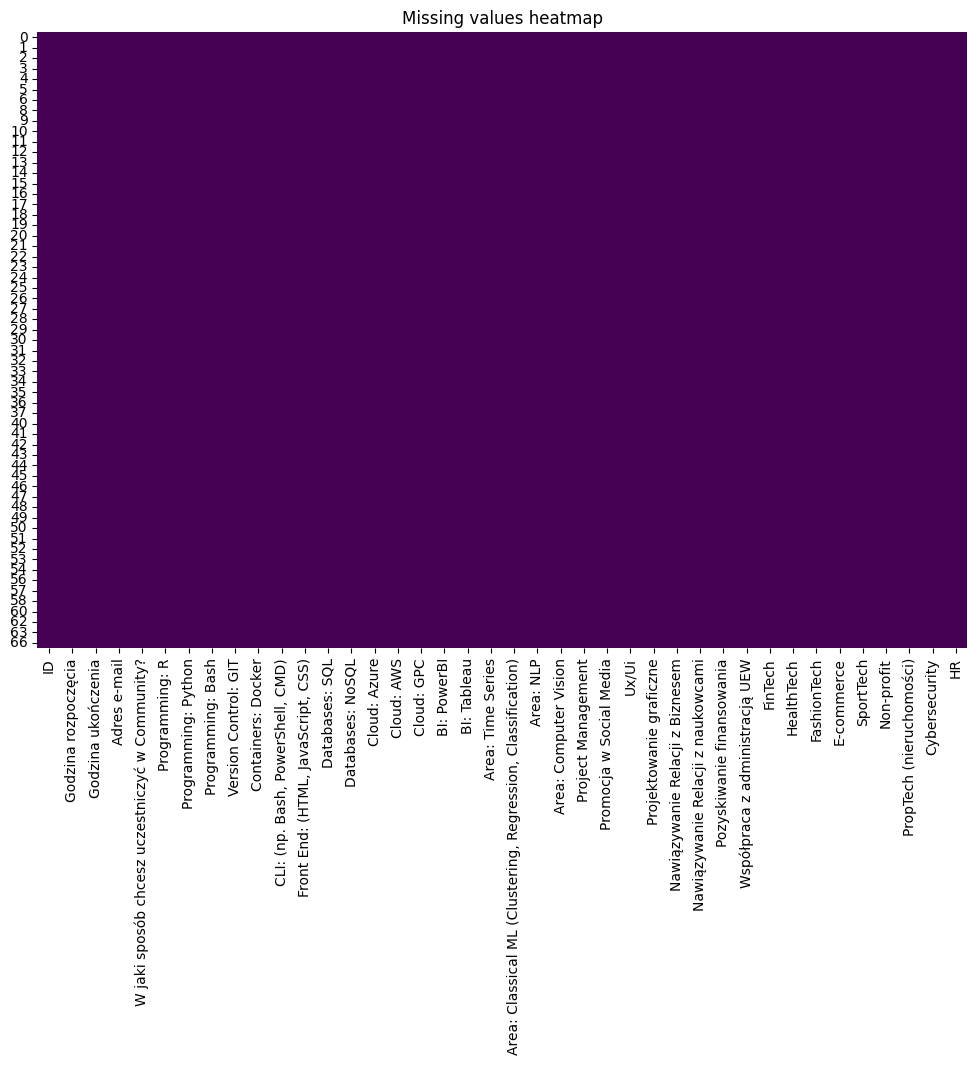

In [106]:
# Visualizing missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned_dropped.isnull(), cbar=False, cmap='viridis', yticklabels=True)
plt.title('Missing values heatmap')
plt.show()

Let's compare two datasets, before and after resizing.

In [107]:
# Checking the size of the original dataset
original_dataset_size = data.shape

# Display the size of the original dataset
print("Number of rows:", original_dataset_size[0])
print("Number of columns:", original_dataset_size[1])

# Checking the size of the original dataset
data_cleaned_dropped = data_cleaned_dropped.shape

# Display the size of the original dataset
print("New number of rows:", data_cleaned_dropped[0])
print("New number of columns:", data_cleaned_dropped[1])


Number of rows: 67
Number of columns: 45
New number of rows: 59
New number of columns: 40


As we see, the dataset shrinked a bit. In the next step I will save this file locally and put it in a `02_Interim` data folder.

In [108]:
# Ensuring that data_cleaned is defined correctly as a df
if isinstance(data_cleaned_dropped, pd.DataFrame):
    print("data_cleaned is a DataFrame.")
else:
    print("data_cleaned is not a DataFrame. Please check your variable assignment.")

# Columns to drop
columns_to_drop = [
    'Nazwa',
    'Czas ostatniej modyfikacji',
    'Jeżeli pominięto branżę, na której się znasz dopisz ją:',
    'Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:',
    'Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.'
]

# Dropping specified columns from the cleaned dataset
data_cleaned_dropped = data_cleaned.drop(columns=columns_to_drop)

# Confirming the DataFrame type
if isinstance(data_cleaned_dropped, pd.DataFrame):
    print("data_cleaned_dropped is a DataFrame.")
else:
    print("data_cleaned_dropped is not a DataFrame. Please check the drop operation.")

# Save the cleaned and updated dataset to a CSV file
output_file_path = r'C:\Users\rejen\OneDrive\Documents\GitHub\ProjektAnalitiks\data\02_Interim\dropped_rows_columns.csv'
data_cleaned_dropped.to_csv(output_file_path, index=False)

print(f"Dataset saved to {output_file_path}")


data_cleaned is not a DataFrame. Please check your variable assignment.
data_cleaned_dropped is a DataFrame.
Dataset saved to C:\Users\rejen\OneDrive\Documents\GitHub\ProjektAnalitiks\data\02_Interim\dropped_rows_columns.csv


Now the dataset is exported successfully on my local machine.

---

## Exploratory data analysis ⚛

In this section I will cover exploratory data analysis techniques.

In [109]:
# Importing necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings as wr 
wr.filterwarnings('ignore') 

# Loading the dataset
file_path = r'C:\Users\rejen\OneDrive\Documents\GitHub\ProjektAnalitiks\data\02_Interim\dropped_rows_columns.csv'
cleaned = pd.read_csv(file_path)

After importing necessary libraries and cleaned .csv file from the previous part, we can now start with basic data exploration and later on go into details.

In [110]:
# Display basic information about the dataset
print("Data Info:")
print(cleaned.info())

# Display basic statistics of the dataset
print("\nBasic Statistics:")
print(cleaned.describe(include='all'))

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 40 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   ID                                                           59 non-null     int64  
 1   Godzina rozpoczęcia                                          59 non-null     object 
 2   Godzina ukończenia                                           59 non-null     object 
 3   Adres e-mail                                                 59 non-null     object 
 4   W jaki sposób chcesz uczestniczyć w Community?               59 non-null     object 
 5   Programming: R                                               59 non-null     float64
 6   Programming: Python                                          59 non-null     float64
 7   Programming: Bash                                            59 non-nul

Checking for missing values:

In [111]:
# Checking for missing values
missing_values = cleaned.isnull().sum()
print("\nMissing values:")
print(missing_values[missing_values > 0])


Missing values:
Series([], dtype: int64)


Empty series - no missing values as shown above.

I will clear some leftover columns from the dataset that I won't use.

In [112]:
columns_to_remove = ['Godzina rozpoczęcia', 'Godzina ukończenia', 'Adres e-mail']
data_cleaned = data.drop(columns=columns_to_remove)

# Displaying the remaining columns of the dataset
remaining_columns = data_cleaned.columns.tolist()

From categorical data we can extract the type of preferred activity in community.

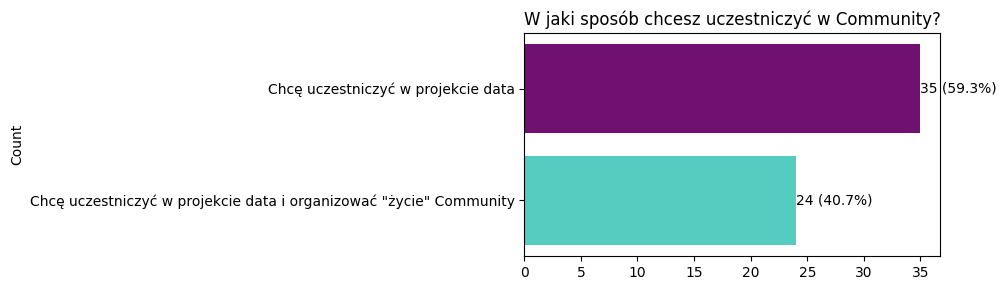

In [113]:
# Plot the count plot for the specific column "W jaki sposób chcesz uczestniczyć w Community?" with count and percentages
plt.figure(figsize=(10, 3))
ax = sns.countplot(y=cleaned["W jaki sposób chcesz uczestniczyć w Community?"], order=cleaned["W jaki sposób chcesz uczestniczyć w Community?"].value_counts().index, palette=["purple", "turquoise"])
plt.title("W jaki sposób chcesz uczestniczyć w Community?", fontsize=12)
plt.xlabel('')
plt.ylabel('Count', fontsize=10)

# Add count and percentage labels
total = len(cleaned["W jaki sposób chcesz uczestniczyć w Community?"])
for p in ax.patches:
    count = int(p.get_width())
    percentage = f'{100 * p.get_width() / total:.1f}%'
    label = f'{count} ({percentage})'
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(label, (x, y), ha='left', va='center')

plt.tight_layout()
plt.show()


From the graph above we can conclude that almost **60%** of respondents are only interested in participation in data project, and the rest (**~40%**) desires to both participate in data project and organize community life. We are taking into consideration only those respondents that want to be active members of this community, filtering out 8 respondents who declared passive membership.

In [114]:
# Let's drop the columns 'Nazwa' and 'Czas ostatniej modyfikacji' if they exist
columns_to_remove = ['Nazwa', 'Czas ostatniej modyfikacji']
data_cleaned = data_cleaned.drop(columns=[col for col in columns_to_remove if col in data_cleaned.columns])

# Ensure the correct dataset is cleaned
cleaned = data_cleaned

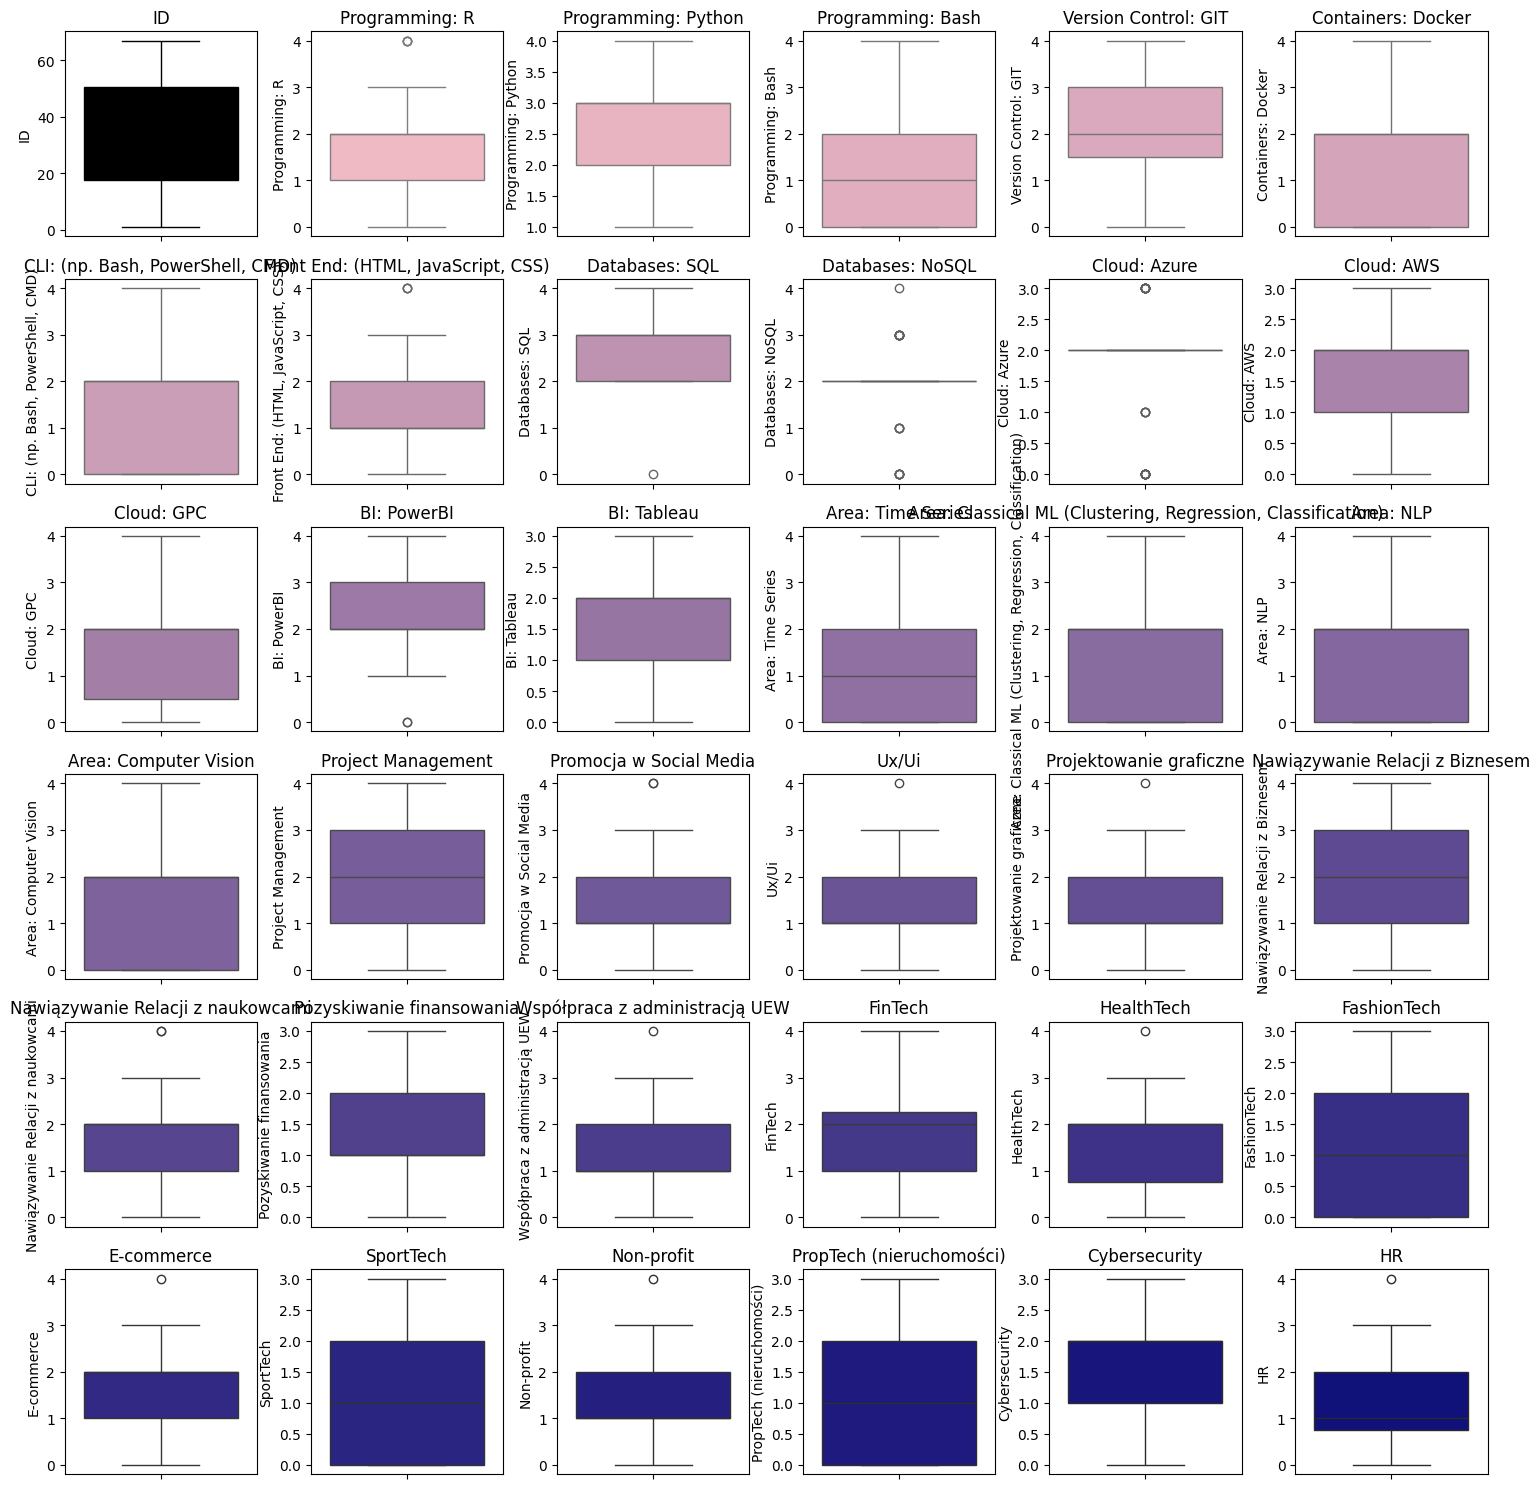

In [115]:
# Identify numerical columns again after column removal
numerical_columns = cleaned.select_dtypes(include=['float64', 'int64']).columns

# Generate a more contrasting gradient from pale pink to vivid blue
num_columns = len(numerical_columns)
gradient_colors = gradient_color('#FFB6C1', '#00008B', num_columns)

# Assign gradient colors to numerical columns
colors = {col: gradient_colors[i] for i, col in enumerate(numerical_columns)}

# Update the color dictionary to include 'ID' with the color black
colors['ID'] = 'black'

# Set the number of rows and columns for the subplots grid
num_rows = 6
num_cols = 6

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten axes array
axes = axes.flatten()

# Generate box plots with specified colors
for i, column in enumerate(numerical_columns):
    color = colors.get(column, 'steelblue')  # Default color if column not in colors
    sns.boxplot(y=cleaned[column].dropna(), ax=axes[i], color=color)  # Drop NA values for plotting
    axes[i].set_title(column)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


##### According to the set of boxplots above I can see that there is a strong represantation of people with high Python and SQL skills, covered with Project Management interests and some Git version control knowledge. Dispersion for Python is a bit more diffused, which means that differenced in skills are more differentiated in case of Python. 
##### To confirm these assumptions I will now generate combo plots (histogram plots with line trends).

Now I will plot histograms for each column containing numerical values and split them by categories with colours.

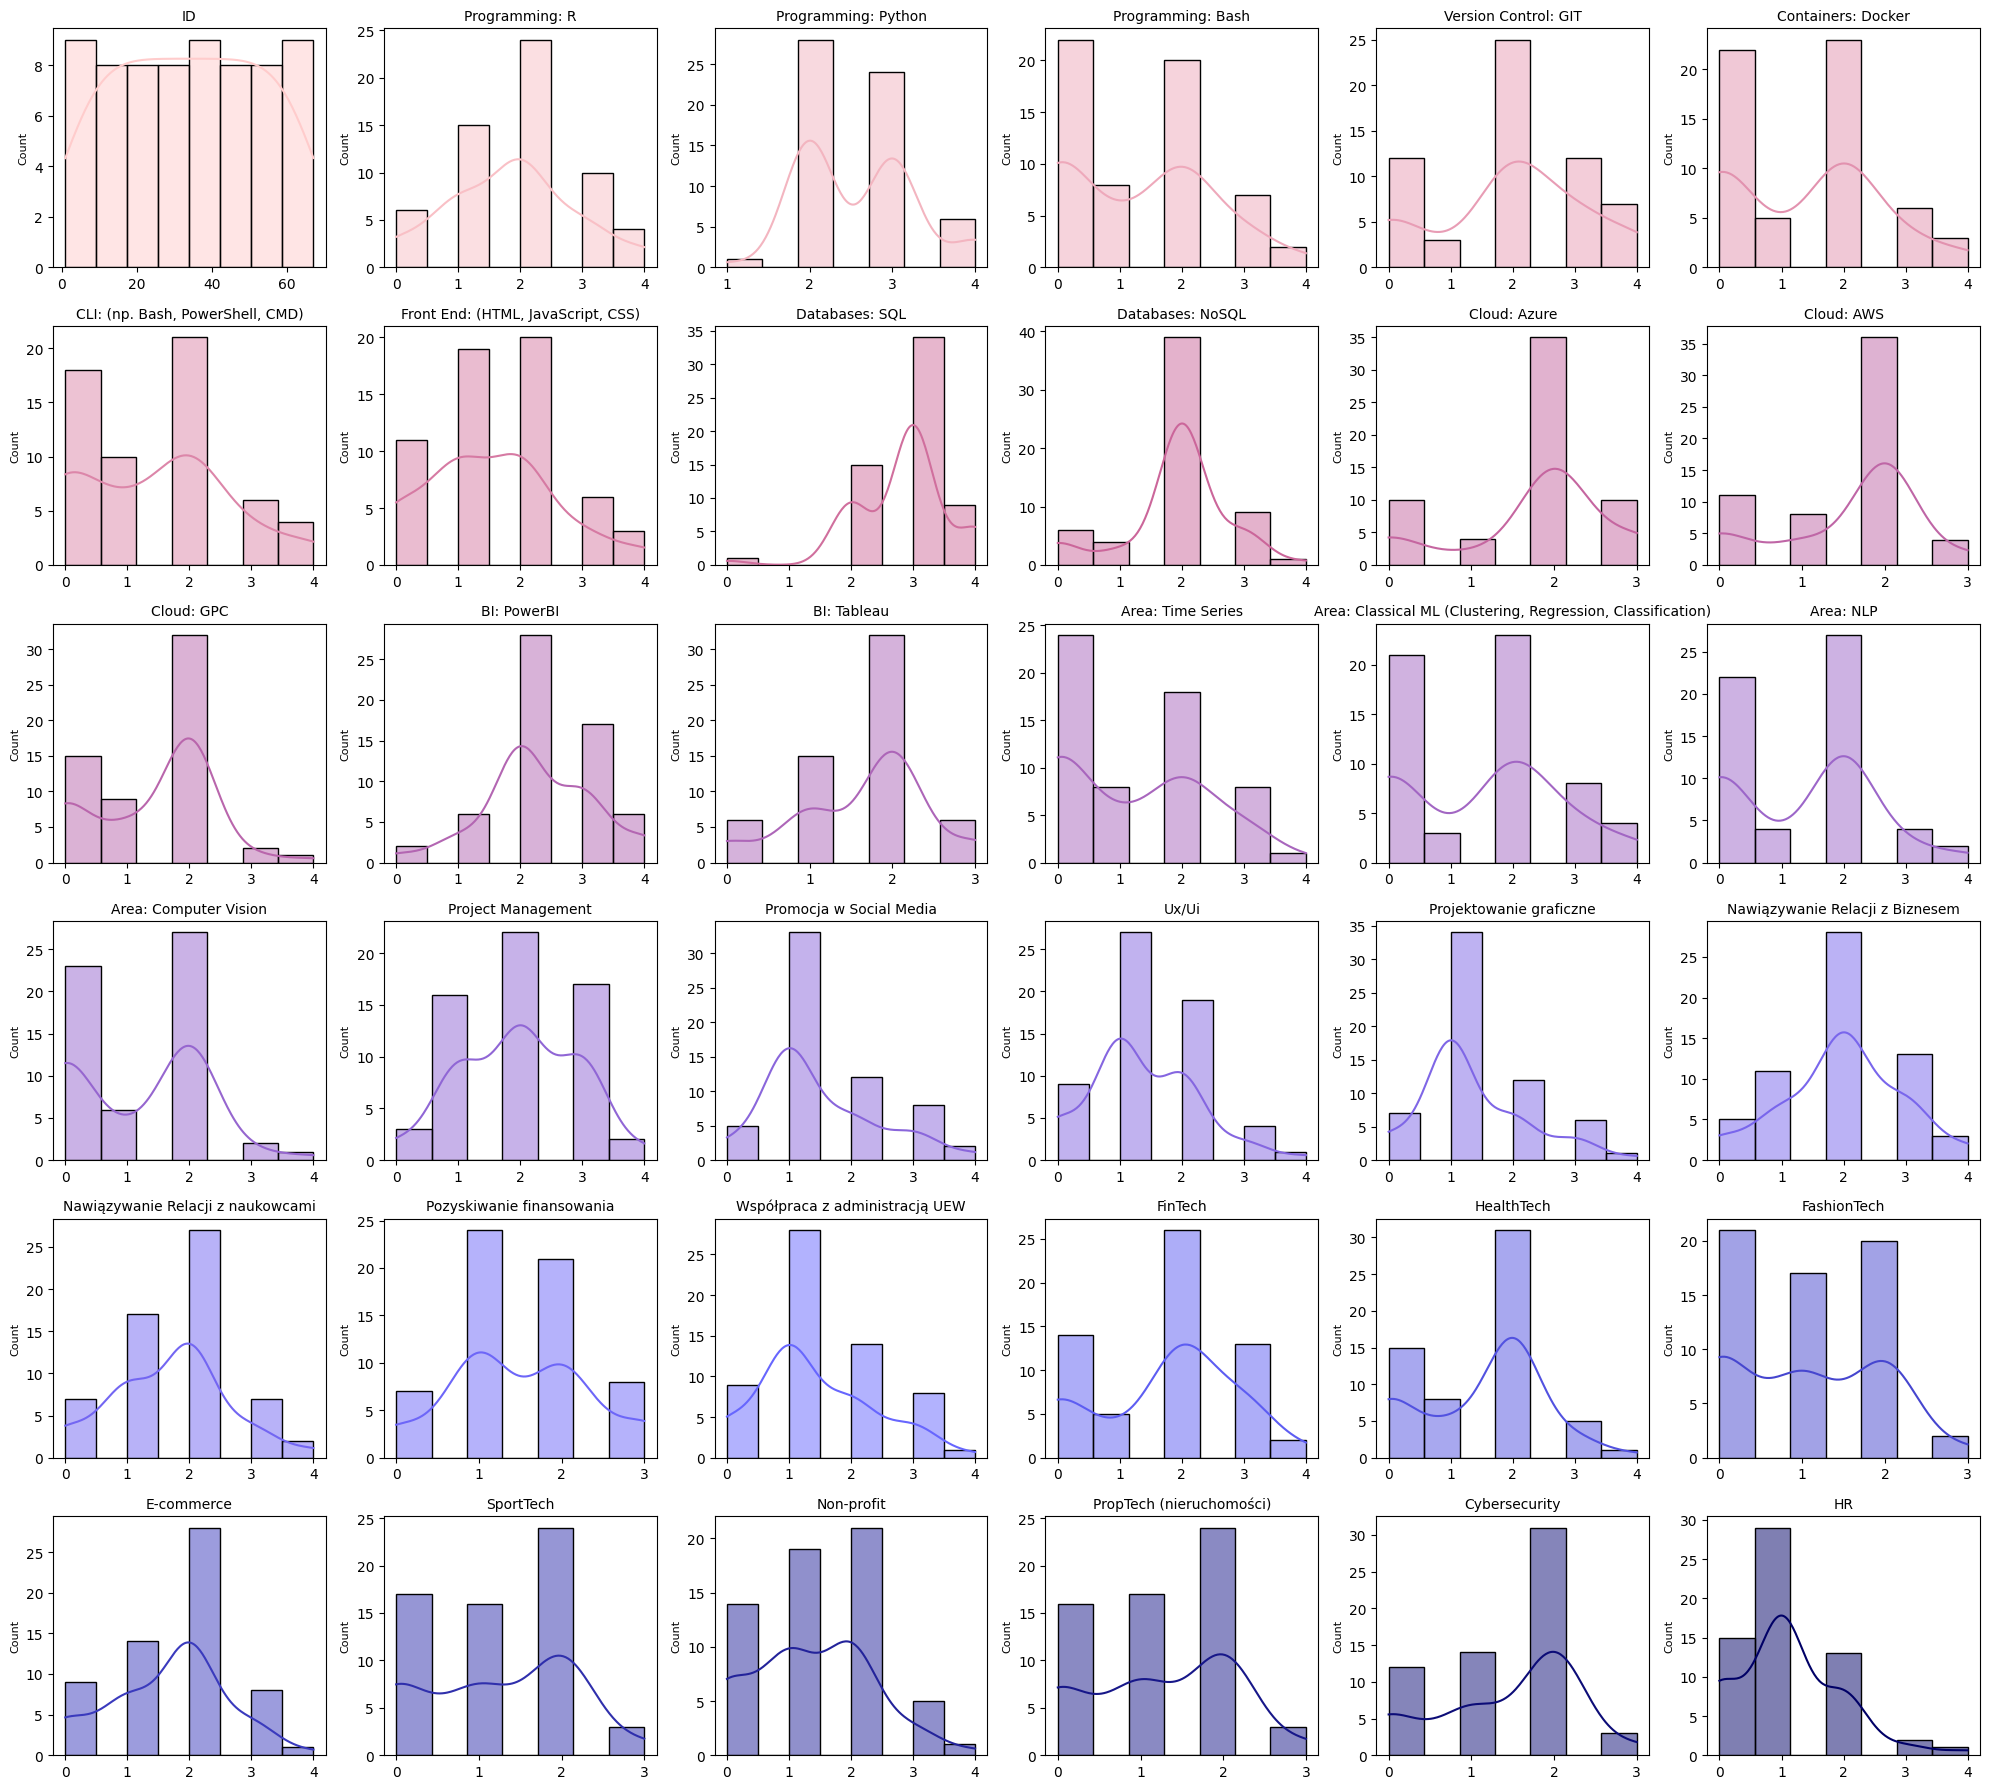

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Generate a custom gradient color map from light pink to dark blue
colors = ['#FFCCCC', '#CC6699', '#9966CC', '#6666FF', '#000066']
n_bins = len(numerical_columns)  # Number of bins for the gradient
cmap_name = 'custom_gradient'
gradient_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Get colors from the colormap
gradient_colors = [gradient_cmap(i) for i in range(n_bins)]

# Create a mapping from columns to gradient colors
column_colors = dict(zip(numerical_columns, gradient_colors))

# Assuming 'cleaned' is your DataFrame
# Identify numerical columns
numerical_columns = cleaned.select_dtypes(include=['float64', 'int64']).columns

# Number of plots
num_plots = len(numerical_columns)

# Calculate the number of rows needed
num_cols = 6
num_rows = (num_plots + num_cols - 1) // num_cols

# Plotting histograms for numerical variables and grouping by skill types with gradient colors
plt.figure(figsize=(20, num_rows * 3))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    color = column_colors.get(col, 'indigo')  # Default color for ungrouped columns
    sns.histplot(cleaned[col], kde=True, color=color)
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=8)
plt.tight_layout()
plt.show()


##### **Conclusion**: After generating histograms with line graph for each column, it is more visible that respondents are the most proficient in **SQL databases**. 
##### The least proficiency is observed in **HR** teritory, in **social media promotion** and **creating visuals**.

Let's apply some more advanced EDA techniques. First, let's handle the data imputation part.

In [119]:
from sklearn.impute import KNNImputer
import pandas as pd

# Load the dataset
file_path = r'C:\Users\rejen\OneDrive\Documents\GitHub\ProjektAnalitiks\data\02_Interim\dropped_rows_columns.csv'
data = pd.read_csv(file_path)

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer to the numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Handle columns with all missing values
columns_with_all_missing = numerical_data.columns[numerical_data.isnull().all()].tolist()
numerical_data = numerical_data.drop(columns=columns_with_all_missing)

imputed_data = pd.DataFrame(imputer.fit_transform(numerical_data), columns=numerical_data.columns)

# Combine imputed numerical data with non-numerical data
data_imputed = data.copy()
data_imputed[numerical_data.columns] = imputed_data

# Re-add columns that had all missing values, if necessary
for col in columns_with_all_missing:
    data_imputed[col] = data[col]

Next, let's perform outlier detection using Isolation Forest and visualize the results.

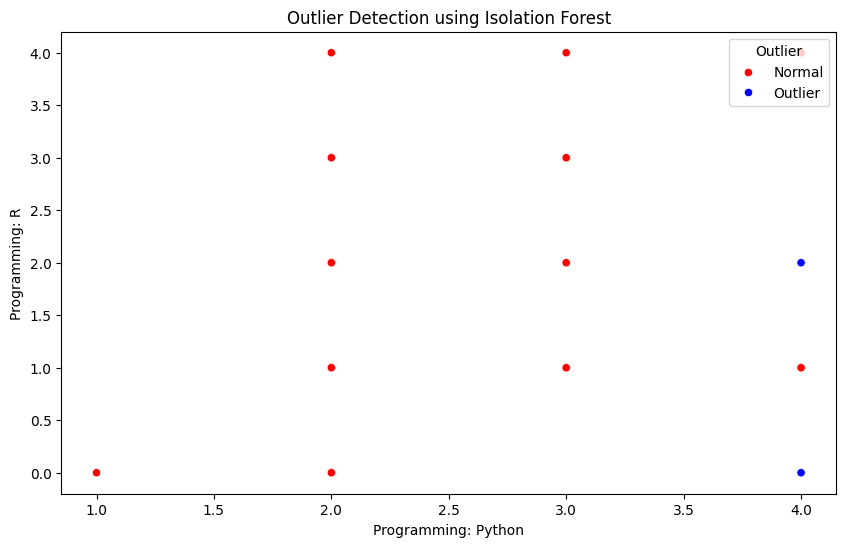

In [120]:
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Isolation Forest
iso_forest = IsolationForest(contamination=0.05)

# Fit the model and predict outliers
outliers = iso_forest.fit_predict(imputed_data)

# Add the outliers to the dataset
data_imputed['Outlier'] = outliers

# Visualize the outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_imputed, x='Programming: Python', y='Programming: R', hue='Outlier', palette=['blue', 'red'])
plt.title('Outlier Detection using Isolation Forest')
plt.xlabel('Programming: Python')
plt.ylabel('Programming: R')
plt.legend(title='Outlier', loc='upper right', labels=['Normal', 'Outlier'])
plt.show()
